In [1]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.10.0
Num GPUs Available: 1


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())


TensorFlow version: 2.10.0
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!python --version


Python 3.10.0


In [4]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())

TensorFlow version: 2.10.0
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.0
Num GPUs Available: 1


In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [7]:
import matplotlib.pyplot as plt

In [10]:
def plots(idx):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[idx])
    plt.axis('off')

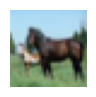

In [11]:
plots(12)

In [12]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]


In [13]:
y_train[12][0]

7

In [14]:
classes[y_train[12][0]]

'horse'

In [15]:
x_train_scalled = x_train/255
x_test_scalled = x_test/255

In [16]:
x_train_scalled.shape

(50000, 32, 32, 3)

In [17]:
y_train[20:30]

array([[4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0]], dtype=uint8)

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float'
)
y_train_categorical[30]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
"""model = keras.Sequential([
    keras.layers.Flatten( input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000,  activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_scalled, y_train_categorical, epochs=30)"""

"model = keras.Sequential([\n    keras.layers.Flatten( input_shape=(32,32,3)),\n    keras.layers.Dense(3000, activation='relu'),\n    keras.layers.Dense(3000,  activation='relu'),\n    keras.layers.Dense(10,  activation='sigmoid')\n])\n\nmodel.compile(\n    optimizer='SGD',\n    loss='categorical_crossentropy',\n    metrics=['accuracy'])\n\nmodel.fit(x_train_scalled, y_train_categorical, epochs=30)"

In [20]:
def models():
    model = keras.Sequential([
        keras.layers.Flatten( input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000,  activation='relu'),
        keras.layers.Dense(10,  activation='sigmoid')
    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [22]:
%%timeit -n1 -r1
with tf.device('CPU:0'):
    cpu_model = models()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs=1)


1563/1563 [==============================] - 80s 51ms/step - loss: 1.8101 - accuracy: 0.3527
1min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
with tf.device('GPU:0'):
    gpu_model = models()
    gpu_model.fit(x_train_scalled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 58s 37ms/step - loss: 1.8090 - accuracy: 0.3549
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
